In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [133]:
df4_40=pd.read_excel("Z02FH cycle life 230308.xlsx", 
                     sheet_name=1, 
                     skiprows=3, 
                     header=None,
                     usecols=list(range(9)),
                     names=['Cycle','UUT1','UUT2','UUT3','UUT4','UUT5','UUT6','UUT7','UUT8'],
                     index_col=0)
display(df4_40)

,UUT1,UUT2,UUT3,UUT4,UUT5,UUT6,UUT7,UUT8
Cycle,,,,,,,,
1,12.98,13.02,12.87,13.06,12.98,12.78,13.04,12.94
2,12.98,13.01,12.88,13.07,12.98,12.79,13.04,12.95
3,12.97,13.01,12.88,13.06,12.98,12.78,13.04,12.93
4,12.97,13.00,12.87,13.06,12.98,12.78,13.03,12.94
5,12.95,12.99,12.86,13.05,12.96,12.76,13.02,12.92
...,...,...,...,...,...,...,...,...
1340,NaN,NaN,NaN,NaN,NaN,11.17,NaN,NaN
1341,NaN,NaN,NaN,NaN,NaN,11.17,NaN,NaN
1342,NaN,NaN,NaN,NaN,NaN,11.17,NaN,NaN


In [134]:
df4_35=pd.read_excel("Z02FH cycle life 230308.xlsx", 
                     sheet_name=0, 
                     skiprows=4, 
                     header=None,
                     nrows=1714,
                     usecols=list(range(7)),
                     names=['Cycle','UUT1','UUT2','UUT3','UUT4','UUT5','UUT6'],
                     index_col=0)
display(df4_35)

,UUT1,UUT2,UUT3,UUT4,UUT5,UUT6
Cycle,,,,,,
1,12.19,12.29,12.38,12.09,12.16,12.45
2,12.21,12.32,12.41,12.12,12.18,12.48
3,12.21,12.33,12.41,12.13,12.18,12.48
4,12.22,12.33,12.42,12.14,12.19,12.49
5,12.22,12.34,12.43,12.15,12.20,12.50
...,...,...,...,...,...,...
1710,10.44,NaN,NaN,10.64,10.61,NaN
1711,10.45,NaN,NaN,10.63,10.62,NaN
1712,10.44,NaN,NaN,10.63,NaN,NaN


The cycles to get the mean to 0.8 is [2507.71548318].


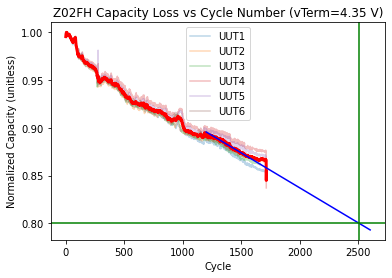

In [203]:
from sklearn.linear_model import LinearRegression
df4_35n=df4_35.apply(lambda x: x/x.max(), axis=0)
X= np.array(range(1250,1501)).reshape(-1,1)
y= df4_35n.mean(axis=1,skipna=True).loc[1250:1500]
reg = LinearRegression().fit(X, y)
xfit = np.array([1200,2600]).reshape(-1,1)
yfit = reg.predict(xfit)

N=(0.8-reg.intercept_)/reg.coef_
print(f'The cycles to get the mean to 0.8 is {N}.')

df4_35n.plot(use_index=True, alpha=0.3)
df4_35n.mean(axis=1,skipna=True).plot(use_index=True,color='red',lw=3)
plt.plot(xfit,yfit,color='blue')
plt.title("Z02FH Capacity Loss vs Cycle Number (vTerm=4.35 V)")
plt.xlabel("Cycle")
plt.ylabel("Normalized Capacity (unitless)")
plt.axhline(y = 0.8, color = 'g', linestyle = '-')
plt.axvline(x = N, color = 'g')


The cycles to get the mean to 0.8 is [2354.92728572].


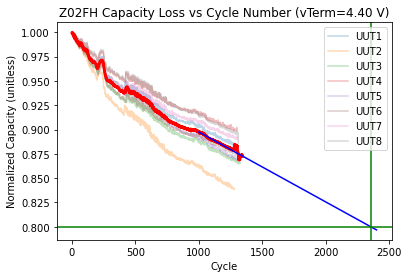

In [204]:
from sklearn.linear_model import LinearRegression
df4_40n=df4_40.apply(lambda x: x/x.max(), axis=0)
X= np.array(range(1000,1201)).reshape(-1,1)
y= df4_40n.mean(axis=1,skipna=True).loc[1000:1200]
reg = LinearRegression().fit(X, y)
xfit = np.array([1000,2400]).reshape(-1,1)
yfit = reg.predict(xfit)

N=(0.8-reg.intercept_)/reg.coef_
print(f'The cycles to get the mean to 0.8 is {N}.')

df4_40n.plot(use_index=True, alpha=0.3)
df4_40n.mean(axis=1,skipna=True).plot(use_index=True,color='red',lw=3)
plt.plot(xfit,yfit,color='blue')
plt.title("Z02FH Capacity Loss vs Cycle Number (vTerm=4.40 V)")
plt.xlabel("Cycle")
plt.ylabel("Normalized Capacity (unitless)")
plt.axhline(y = 0.8, color = 'g', linestyle = '-')
plt.axvline(x = N, color = 'g')
